# <center>k-Means Clustering
========================================================================================================================    
</center>
K-Means Clustering is one of the best clustering algorithm. We want to check if we can use Clustering to detect fake proflies on Twitter. 

## STEP 1: IMPORT LIBRARIES

In [48]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pylab as pl
#%matplotlib inline

## STEP 2: LOAD DATASET

In [49]:
dataset = pd.read_csv('data/twitter_dataset.csv', encoding = 'latin-1')
dataset.head()

,name_wt,statuses_count,followers_count,friends_count,favourites_count,listed_count,label
0,0.937500,43,5,34,0,0,1
1,0.909091,12204,1182,1327,0,4,1
2,0.909091,42,3,34,0,0,1
3,1.000000,215,1158,1545,0,21,1
4,0.285714,38420,2293,2198,1987,2,0


In [50]:
dataset.shape

(6945, 7)

## STEP 3: CREATE NEW DATASET WITHOUT LABELS

Remove labels of the dataset

In [51]:
#List of attributes
features=[]
for attributes in dataset.columns:
    if attributes != 'label':
        features.append(attributes)
features

['name_wt',
 'statuses_count',
 'followers_count',
 'friends_count',
 'favourites_count',
 'listed_count']

In [52]:
y = np.array(dataset['label'])
y

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [53]:
#Drop 'label' of each instance 
X = np.array(dataset.drop(['label'], 1).astype(float))
X

array([[9.37500000e-01, 4.30000000e+01, 5.00000000e+00, 3.40000000e+01,
        0.00000000e+00, 0.00000000e+00],
       [9.09090909e-01, 1.22040000e+04, 1.18200000e+03, 1.32700000e+03,
        0.00000000e+00, 4.00000000e+00],
       [9.09090909e-01, 4.20000000e+01, 3.00000000e+00, 3.40000000e+01,
        0.00000000e+00, 0.00000000e+00],
       ...,
       [8.18181818e-01, 1.04390000e+04, 7.80000000e+01, 8.20000000e+01,
        0.00000000e+00, 3.90000000e+01],
       [9.09090909e-01, 5.25000000e+02, 3.60000000e+01, 7.10000000e+01,
        5.30000000e+01, 0.00000000e+00],
       [5.45454545e-01, 1.26200000e+04, 6.13000000e+02, 2.00200000e+03,
        2.00000000e+00, 6.00000000e+00]])

In [54]:
X.shape

(6945, 6)

## STEP 4: FIND OPTIMAL NUMBER OF CLUSTERS

In [55]:
#normalizing the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[9.37500000e-01, 1.07619727e-04, 5.06669288e-06, 2.38277116e-04,
        0.00000000e+00, 0.00000000e+00],
       [9.09090909e-01, 3.05439802e-02, 1.19776620e-03, 9.29981569e-03,
        0.00000000e+00, 2.20580126e-04],
       [9.09090909e-01, 1.05116943e-04, 3.04001573e-06, 2.38277116e-04,
        0.00000000e+00, 0.00000000e+00],
       ...,
       [8.18181818e-01, 2.61265658e-02, 7.90404089e-05, 5.74668339e-04,
        0.00000000e+00, 2.15065623e-03],
       [9.09090909e-01, 1.31396178e-03, 3.64801887e-05, 4.97578684e-04,
        1.68814540e-04, 0.00000000e+00],
       [5.45454545e-01, 3.15851385e-02, 6.21176547e-04, 1.40303173e-02,
        6.37035999e-06, 3.30870189e-04]])

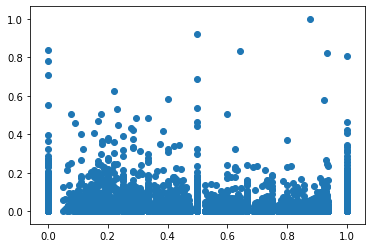

In [56]:
plt.scatter(X_scaled[:,0],X_scaled[:,1], label='True Position')

In [57]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_scaled)
    Sum_of_squared_distances.append(km.inertia_)

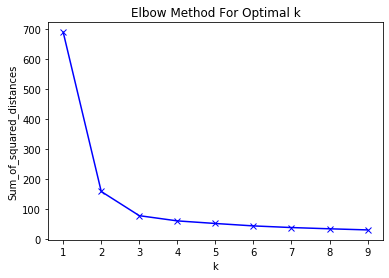

In [58]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## STEP 5: PLOT ORIGINAL DATASET USING PCA

In [59]:
#applying PCA on scaled dataset
pca = PCA(n_components=2).fit(X_scaled)
pca_2d = pca.transform(X_scaled)

pca_2d

array([[-0.28020446, -0.00997201],
       [-0.2502784 ,  0.01886285],
       [-0.25183568, -0.01147055],
       ...,
       [-0.15973128,  0.00926623],
       [-0.25177133, -0.01024205],
       [ 0.11290039,  0.00097436]])

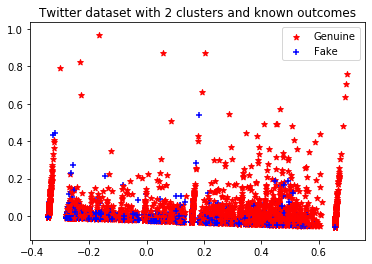

In [60]:
#Plotting original dataset based on lables after applying PCA

for i in range(0, pca_2d.shape[0]):
    if y[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='*')
    
    elif y[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='+')
        
pl.legend([c1, c2], ['Genuine', 'Fake'])
pl.title('Twitter dataset with 2 clusters and known outcomes')
pl.show()

## STEP 6: APPLY k-MEANS CLUSTERING 

In [61]:
#Thus optimal value for k=2
km = KMeans(n_clusters=2)
km = km.fit(pca_2d)
pca_2d.shape

(6945, 2)

In [62]:
print(km.cluster_centers_)                       #k-Means returns k centroids

[[-0.24003804  0.00091172]
 [ 0.31844242 -0.00120951]]


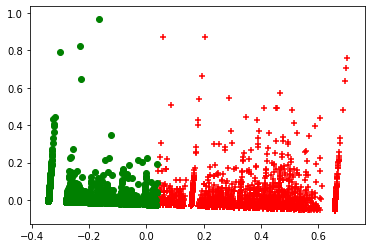

In [63]:
#Plotting the data into two clusters

for i in range(0, pca_2d.shape[0]):
    if km.labels_[i] == 1:
        c1 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
    
    elif km.labels_[i] == 0:
        c2 = plt.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')

In [64]:
#Checking predicted labels againest actual labels
correct=0
for i in range(0, pca_2d.shape[0]):
    if km.labels_[i] == y[i]:
        #print(km.labels_[i])
        correct+=1

print(correct/len(y))

0.2836573074154068
